<a href="https://colab.research.google.com/github/akutayaydin/Magnimind-3/blob/main/Twitter_NLP_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter NLP Classification Project

Goal: Create a ML model for Business Category tweets

In [2]:
import pandas as pd

In [3]:
#For Google Colab
url ='https://raw.githubusercontent.com/akutayaydin/Magnimind-3/main/tweet_data_small_filtered.csv'
df = pd.read_csv(url)

In [4]:
#df = pd.read_csv('tweet_data.csv')

In [5]:
#Select Business Category Only as Request
df = df[df['topicName'] == 'Business']

In [63]:
df.head(20)

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1072758722315862021,2018-12-12 07:43:04,2,5001,9618,False,True,True,5771,NaN,3847,621523,UK Prime Minister Theresa May will face a vote...,Business,38564612,5402612,BBC Breaking News,NaN
1,1072959907958276096,2018-12-12 21:02:31,2,5001,10388,False,True,True,6977,https://pbs.twimg.com/media/DuPrWYHW4AEXol3.jpg,3411,621523,UK PM Theresa May wins confidence vote with 20...,Business,38567131,5402612,BBC Breaking News,NaN
2,1073329348755767303,2018-12-13 21:30:32,2,5001,6734,False,True,True,4467,NaN,2267,3108351,The probe of the inaugural fund partly arises ...,Business,57108,705706292,Rebecca Ballhaus,NaN
3,1073499538659393536,2018-12-14 08:46:49,1,5001,6914,True,True,True,5402,NaN,1512,621523,The week Brexit hit the brick wall : Commons ...,Business,879928,25984418,Nick Robinson,NaN
4,1073542862573371392,2018-12-14 11:38:58,2,5001,6269,False,True,True,4610,NaN,1659,621523,Have watched these kinds of pictures looking f...,Business,888862,61183568,Laura Kuenssberg,https://video.twimg.com/ext_tw_video/107354281...
5,1074475798227226627,2018-12-17 01:26:07,2,5001,7701,False,True,False,5730,NaN,1971,-1,The world's most successful people start their...,Business,2700458,16896485,Inc.,NaN
6,1074056878542471169,2018-12-15 21:41:29,1,5001,6284,True,True,True,5207,NaN,1077,2735591,"“This is Pearl Harbor. The whole country, and ...",Business,12423,41154223,Saikat Chakrabarti,NaN
7,1074964829830557696,2018-12-18 09:49:21,2,5001,8678,False,True,True,5206,https://pbs.twimg.com/media/DusKzteX4AASYwo.jpg,3472,621523,Jose Mourinho has been sacked by Manchester Un...,Business,7573834,265902729,BBC Sport,NaN
8,1075269960086241281,2018-12-19 06:01:50,1,5001,786,True,True,False,548,NaN,238,-1,"Pursue your ideas, no matter how obvious they ...",Business,5376604,14800270,Harvard Biz Review,NaN
9,1075315807666794496,2018-12-19 09:04:01,1,5001,664,True,True,False,436,NaN,228,-1,You don’t have to choose between being a leade...,Business,5376647,14800270,Harvard Biz Review,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30024 entries, 0 to 30023
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetID     30024 non-null  int64 
 1   crDate      30024 non-null  object
 2   edInput     30024 non-null  int64 
 3   editor      30024 non-null  int64 
 4   engages     30024 non-null  int64 
 5   isApproved  30024 non-null  bool  
 6   isEdNeed    30024 non-null  bool  
 7   isRT        30024 non-null  bool  
 8   likes       30024 non-null  int64 
 9   photoUrl    2389 non-null   object
 10  retweets    30024 non-null  int64 
 11  rtUsID      30024 non-null  int64 
 12  text        30024 non-null  object
 13  topicName   30024 non-null  object
 14  usFlwrs     30024 non-null  int64 
 15  usID        30024 non-null  int64 
 16  usName      30024 non-null  object
 17  videoUrl    7184 non-null   object
dtypes: bool(3), int64(9), object(6)
memory usage: 4.8+ MB


In [66]:
list(df.iloc[11:19,12]),list(df.iloc[11:19,2])
#I am assuming edInput
#Category 1: Non-Business
#Category 2: Business

(['Add a second monitor for your laptop https://t.co/4FlNf4wQKX',
  'Why Utah drops fish out of airplanes into its mountain lakes https://t.co/ZYY1cw9qLU',
  "We spent a day with one of the sanctuary's keepers to see what it takes to work with these beautiful, but incredibly dangerous animals 🦁 https://t.co/95J2GREqVl",
  "'Aquaman' has already made more money than its production budget, and is looking at a big opening in the US https://t.co/RjvSmOFIpN",
  "Here's what 8 a.m. looks like around the world 🌏 https://t.co/kP01YudSSw",
  '.@novogratz is putting more of his money where his mouth is when it comes to cryptocurrencies https://t.co/yPvmfXqJbQ',
  "An exercise scientist explains why you shouldn't do sit-ups or crunches https://t.co/UkCtOQmCR9",
  'After a punishing year, crypto enthusiasts looking for a fresh start in 2019 are being greeted by some positive technical signals https://t.co/nVgzz77fIR'],
 [1, 1, 1, 1, 2, 1, 1, 1])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30024 entries, 0 to 30023
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetID     30024 non-null  int64 
 1   crDate      30024 non-null  object
 2   edInput     30024 non-null  int64 
 3   editor      30024 non-null  int64 
 4   engages     30024 non-null  int64 
 5   isApproved  30024 non-null  bool  
 6   isEdNeed    30024 non-null  bool  
 7   isRT        30024 non-null  bool  
 8   likes       30024 non-null  int64 
 9   photoUrl    2389 non-null   object
 10  retweets    30024 non-null  int64 
 11  rtUsID      30024 non-null  int64 
 12  text        30024 non-null  object
 13  topicName   30024 non-null  object
 14  usFlwrs     30024 non-null  int64 
 15  usID        30024 non-null  int64 
 16  usName      30024 non-null  object
 17  videoUrl    7184 non-null   object
dtypes: bool(3), int64(9), object(6)
memory usage: 4.8+ MB


>Preprocessing starts here

In [34]:
df_section = df[['tweetID','text','topicName','usID','usName','edInput','crDate']].copy()

We dont need these columns.
5 unique values for edInput : (5, array([-1,  2,  1,  4,  3]))
2 unique values for isApproved: (2, array([False,  True]))
12 unique values for editor: (12,
 array([  -1, 5001, 5003, 5004, 5002, 1001, 2001, 5006, 5101, 5005, 5008,
        5007]))
42 unique values for topicname:(42,
 array(['Business', 'Animal', 'Memes', 'Nature', 'Travel', 'Interesting',
        'News', 'Fashion', 'Art', 'Personal Development', 'Motivational',
        'DIY & Craft', 'Editorial Pics', 'Funny', 'Poem', 'World Leaders',
        'Entrepreneurship', 'US News', 'Journalists', 'Flowers',
        'Cryptocurrency', 'Photography', 'Design & Architecture',
        'Fitness', 'Spirituality', 'Startup', 'Space', 'Technology',
        'Digital Media & Internet', 'Psychology', 'Science', 'Basketball',
        'Humor', 'Mindfulness', 'Medical', 'Informative', 'Love', 'Stocks',
        'Nanotech', 'Biotech', 'science', 'Random'], dtype=object))

In [35]:
#Remove duplicates from the dataframe

In [36]:
df_section = df_section.drop_duplicates(subset='text')

In [37]:
df_section.head()

,tweetID,text,topicName,usID,usName,edInput,crDate
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58


>Preprocessing ends here

>Text Processing and Tokenization starts here

In [38]:
#1. Tokenize text column and save it as a list in tokens column
#2. Convert all words in the tokens column to lowercase
#3. Remove Stopwords
#4. Find all urls and parse them to a new column (tokens_url) >> TODO: Later this url(s) will be scraped to get more information about the category. 
#5. Remove Punctuations and create a new column (tokens_new)   

In [39]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [40]:
tknz =TweetTokenizer()

In [41]:
df_section['tokens'] =''

In [42]:
df_section['tokens'] = df['text'].apply(tknz.tokenize)

In [43]:
df_section.head()

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[UK, Prime, Minister, Theresa, May, will, face..."
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[UK, PM, Theresa, May, wins, confidence, vote,..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[The, probe, of, the, inaugural, fund, partly,..."
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[The, week, Brexit, hit, the, brick, wall, :, ..."
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[Have, watched, these, kinds, of, pictures, lo..."


In [68]:
df_section.shape

(30021, 9)

In [69]:
#Convert the list to lowercase
def convert_string_lower(strings):
    newList = []
    for string in strings:
        string = string.replace('\'','') # don't loose words with these character
        string = string.replace('-','') # don't loose words with these character
        newList.append(string.lower())
    return newList

df_section['tokens'] = list(map(convert_string_lower,df_section['tokens'])) 

In [70]:
df_section.head(5)

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[uk, prime, minister, theresa, may, face, vote...",[https://t.co/wzta1v9scu]
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[uk, pm, theresa, may, wins, confidence, vote,...","[https://t.co/9vw2goqodc, https://t.co/bafuusz..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[probe, inaugural, fund, partly, arises, mater...",[https://t.co/wvercqwnvg]
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[week, brexit, hit, brick, wall, :, commons, ’...",[]
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[watched, kinds, pictures, looking, body, lang...",[https://t.co/1tg4h62z7l]


In [71]:
import nltk
from nltk.corpus import stopwords

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
#remove stopwords      
nltk_words = stopwords.words('english') 

def remove_stopwords(string):
    output = [w for w in string if w not in nltk_words]
    return output

df_section['tokens'] = df_section['tokens'].apply(remove_stopwords)

In [74]:
df_section.head(10)

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[uk, prime, minister, theresa, may, face, vote...",[https://t.co/wzta1v9scu]
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[uk, pm, theresa, may, wins, confidence, vote,...","[https://t.co/9vw2goqodc, https://t.co/bafuusz..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[probe, inaugural, fund, partly, arises, mater...",[https://t.co/wvercqwnvg]
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[week, brexit, hit, brick, wall, :, commons, ’...",[]
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[watched, kinds, pictures, looking, body, lang...",[https://t.co/1tg4h62z7l]
5,1074475798227226627,The world's most successful people start their...,Business,16896485,Inc.,2,2018-12-17 01:26:07,"[worlds, successful, people, start, day, 4, .,...",[https://t.co/sef0u4xwp8]
6,1074056878542471169,"“This is Pearl Harbor. The whole country, and ...",Business,41154223,Saikat Chakrabarti,1,2018-12-15 21:41:29,"[“, pearl, harbor, ., whole, country, ,, whole...",[https://t.co/vposikgvim]
7,1074964829830557696,Jose Mourinho has been sacked by Manchester Un...,Business,265902729,BBC Sport,2,2018-12-18 09:49:21,"[jose, mourinho, sacked, manchester, united, ....","[https://t.co/xl8mju4w1u, https://t.co/zdrd3vu..."
8,1075269960086241281,"Pursue your ideas, no matter how obvious they ...",Business,14800270,Harvard Biz Review,1,2018-12-19 06:01:50,"[pursue, ideas, ,, matter, obvious, seem, http...",[https://t.co/irqq39x9h2]
9,1075315807666794496,You don’t have to choose between being a leade...,Business,14800270,Harvard Biz Review,1,2018-12-19 09:04:01,"[’, choose, leader, life, https://t.co/sc9fi5v...",[https://t.co/sc9fi5v8zs]


In [75]:
#Check if any stop words exists
df_section[['the' in x for x in df_section['tokens']]]

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url


In [76]:
#find urls and create a new column for them
#TODO: Scrape this url to get more info     
url_pattern = re.compile(r"([http#]\W+)")

def find_url(string):
    output = [w for w in string if url_pattern.search(w)]
    return output

df_section['tokens_url'] = df_section['tokens'].apply(find_url) #TODO:(BUG) links are case-sensitive. parse url before converting to lowercase


In [77]:
df_section.head(10)

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[uk, prime, minister, theresa, may, face, vote...",[https://t.co/wzta1v9scu]
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[uk, pm, theresa, may, wins, confidence, vote,...","[https://t.co/9vw2goqodc, https://t.co/bafuusz..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[probe, inaugural, fund, partly, arises, mater...",[https://t.co/wvercqwnvg]
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[week, brexit, hit, brick, wall, :, commons, ’...",[]
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[watched, kinds, pictures, looking, body, lang...",[https://t.co/1tg4h62z7l]
5,1074475798227226627,The world's most successful people start their...,Business,16896485,Inc.,2,2018-12-17 01:26:07,"[worlds, successful, people, start, day, 4, .,...",[https://t.co/sef0u4xwp8]
6,1074056878542471169,"“This is Pearl Harbor. The whole country, and ...",Business,41154223,Saikat Chakrabarti,1,2018-12-15 21:41:29,"[“, pearl, harbor, ., whole, country, ,, whole...",[https://t.co/vposikgvim]
7,1074964829830557696,Jose Mourinho has been sacked by Manchester Un...,Business,265902729,BBC Sport,2,2018-12-18 09:49:21,"[jose, mourinho, sacked, manchester, united, ....","[https://t.co/xl8mju4w1u, https://t.co/zdrd3vu..."
8,1075269960086241281,"Pursue your ideas, no matter how obvious they ...",Business,14800270,Harvard Biz Review,1,2018-12-19 06:01:50,"[pursue, ideas, ,, matter, obvious, seem, http...",[https://t.co/irqq39x9h2]
9,1075315807666794496,You don’t have to choose between being a leade...,Business,14800270,Harvard Biz Review,1,2018-12-19 09:04:01,"[’, choose, leader, life, https://t.co/sc9fi5v...",[https://t.co/sc9fi5v8zs]


In [78]:
df_section.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30021 entries, 0 to 30023
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetID     30021 non-null  int64 
 1   text        30021 non-null  object
 2   topicName   30021 non-null  object
 3   usID        30021 non-null  int64 
 4   usName      30021 non-null  object
 5   edInput     30021 non-null  int64 
 6   crDate      30021 non-null  object
 7   tokens      30021 non-null  object
 8   tokens_url  30021 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.3+ MB


In [79]:
list(df_section.iloc[1:2,8])

[['https://t.co/9vw2goqodc', 'https://t.co/bafuuszoka']]

In [80]:
list(df_section.iloc[1:2,1])

['UK PM Theresa May wins confidence vote with 200 out of 317 Tory MPs supporting her to stay on as leader\n\nhttps://t.co/9Vw2gOQoDc https://t.co/bafuUsZoKa']

In [81]:
df_section['tokens_new'] = ''

In [82]:
#remove punctuations

def no_punc(string):
  no_punc = [w for w in string if w.isalpha()]
  return no_punc

df_section['tokens_new'] = df_section['tokens'].apply(no_punc)

In [83]:
df_section.head(5)

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url,tokens_new
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[uk, prime, minister, theresa, may, face, vote...",[https://t.co/wzta1v9scu],"[uk, prime, minister, theresa, may, face, vote..."
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[uk, pm, theresa, may, wins, confidence, vote,...","[https://t.co/9vw2goqodc, https://t.co/bafuusz...","[uk, pm, theresa, may, wins, confidence, vote,..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[probe, inaugural, fund, partly, arises, mater...",[https://t.co/wvercqwnvg],"[probe, inaugural, fund, partly, arises, mater..."
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[week, brexit, hit, brick, wall, :, commons, ’...",[],"[week, brexit, hit, brick, wall, commons, acce..."
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[watched, kinds, pictures, looking, body, lang...",[https://t.co/1tg4h62z7l],"[watched, kinds, pictures, looking, body, lang..."


In [84]:
#Lemmatizing starts here

In [85]:
from nltk.stem import WordNetLemmatizer

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [87]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [88]:
wordnet_lemmatizer = WordNetLemmatizer()

In [89]:
df_section['tokens_lemmatize'] = ''

In [90]:
def word_lemmatize(string):
  output = [wordnet_lemmatizer.lemmatize(w) for w in string]
  return output

df_section['tokens_lemmatize'] =df_section['tokens_new'].apply(word_lemmatize)

In [91]:
df_section.head(10)

,tweetID,text,topicName,usID,usName,edInput,crDate,tokens,tokens_url,tokens_new,tokens_lemmatize
0,1072758722315862021,UK Prime Minister Theresa May will face a vote...,Business,5402612,BBC Breaking News,2,2018-12-12 07:43:04,"[uk, prime, minister, theresa, may, face, vote...",[https://t.co/wzta1v9scu],"[uk, prime, minister, theresa, may, face, vote...","[uk, prime, minister, theresa, may, face, vote..."
1,1072959907958276096,UK PM Theresa May wins confidence vote with 20...,Business,5402612,BBC Breaking News,2,2018-12-12 21:02:31,"[uk, pm, theresa, may, wins, confidence, vote,...","[https://t.co/9vw2goqodc, https://t.co/bafuusz...","[uk, pm, theresa, may, wins, confidence, vote,...","[uk, pm, theresa, may, win, confidence, vote, ..."
2,1073329348755767303,The probe of the inaugural fund partly arises ...,Business,705706292,Rebecca Ballhaus,2,2018-12-13 21:30:32,"[probe, inaugural, fund, partly, arises, mater...",[https://t.co/wvercqwnvg],"[probe, inaugural, fund, partly, arises, mater...","[probe, inaugural, fund, partly, arises, mater..."
3,1073499538659393536,The week Brexit hit the brick wall : Commons ...,Business,25984418,Nick Robinson,1,2018-12-14 08:46:49,"[week, brexit, hit, brick, wall, :, commons, ’...",[],"[week, brexit, hit, brick, wall, commons, acce...","[week, brexit, hit, brick, wall, common, accep..."
4,1073542862573371392,Have watched these kinds of pictures looking f...,Business,61183568,Laura Kuenssberg,2,2018-12-14 11:38:58,"[watched, kinds, pictures, looking, body, lang...",[https://t.co/1tg4h62z7l],"[watched, kinds, pictures, looking, body, lang...","[watched, kind, picture, looking, body, langua..."
5,1074475798227226627,The world's most successful people start their...,Business,16896485,Inc.,2,2018-12-17 01:26:07,"[worlds, successful, people, start, day, 4, .,...",[https://t.co/sef0u4xwp8],"[worlds, successful, people, start, day]","[world, successful, people, start, day]"
6,1074056878542471169,"“This is Pearl Harbor. The whole country, and ...",Business,41154223,Saikat Chakrabarti,1,2018-12-15 21:41:29,"[“, pearl, harbor, ., whole, country, ,, whole...",[https://t.co/vposikgvim],"[pearl, harbor, whole, country, whole, world, ...","[pearl, harbor, whole, country, whole, world, ..."
7,1074964829830557696,Jose Mourinho has been sacked by Manchester Un...,Business,265902729,BBC Sport,2,2018-12-18 09:49:21,"[jose, mourinho, sacked, manchester, united, ....","[https://t.co/xl8mju4w1u, https://t.co/zdrd3vu...","[jose, mourinho, sacked, manchester, united, f...","[jose, mourinho, sacked, manchester, united, f..."
8,1075269960086241281,"Pursue your ideas, no matter how obvious they ...",Business,14800270,Harvard Biz Review,1,2018-12-19 06:01:50,"[pursue, ideas, ,, matter, obvious, seem, http...",[https://t.co/irqq39x9h2],"[pursue, ideas, matter, obvious, seem]","[pursue, idea, matter, obvious, seem]"
9,1075315807666794496,You don’t have to choose between being a leade...,Business,14800270,Harvard Biz Review,1,2018-12-19 09:04:01,"[’, choose, leader, life, https://t.co/sc9fi5v...",[https://t.co/sc9fi5v8zs],"[choose, leader, life]","[choose, leader, life]"


In [92]:
#usID and UsName has the same data

In [93]:
df_column_duplicate = df_section[df_section['usID'] == 2735591] 
df_column_duplicate['usName'].nunique()

0

In [94]:
# Filter out Topic Name Column and edInput -1,3,4
df_section = df_section[(df_section['edInput'] == 1) | (df_section['edInput'] == 2)]
#df_model_baseline = df_section[['usName','edInput','tokens']].copy()
df_model = df_section[['usName','text','edInput','tokens','tokens_lemmatize']].copy()

In [ ]:
#Replace edInput value 1 with 0 and (Non-Business)
#Replace edInput value 2 with 1 (Business)

In [186]:
df_model['edInput'] = df_model['edInput'].replace(1,0) #Changed (03.14)

In [187]:
df_model['edInput'] = df_model['edInput'].replace(2,1) #Changed (03.14)

In [188]:
df_model.head()

,usName,text,edInput,tokens,tokens_lemmatize
0,BBC Breaking News,UK Prime Minister Theresa May will face a vote...,1,"[uk, prime, minister, theresa, may, face, vote...","[uk, prime, minister, theresa, may, face, vote..."
1,BBC Breaking News,UK PM Theresa May wins confidence vote with 20...,1,"[uk, pm, theresa, may, wins, confidence, vote,...","[uk, pm, theresa, may, win, confidence, vote, ..."
2,Rebecca Ballhaus,The probe of the inaugural fund partly arises ...,1,"[probe, inaugural, fund, partly, arises, mater...","[probe, inaugural, fund, partly, arises, mater..."
3,Nick Robinson,The week Brexit hit the brick wall : Commons ...,0,"[week, brexit, hit, brick, wall, :, commons, ’...","[week, brexit, hit, brick, wall, common, accep..."
4,Laura Kuenssberg,Have watched these kinds of pictures looking f...,1,"[watched, kinds, pictures, looking, body, lang...","[watched, kind, picture, looking, body, langua..."


In [189]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score
import time

In [190]:
#Create pipelines for categorical features
steps_cat_logistic = [('imputer', SimpleImputer(strategy ='most_frequent')),
                      ('onehot',OneHotEncoder(handle_unknown ='ignore'))]

steps_text_logistic = [('vectorizer', CountVectorizer())]

categorical_transformer = Pipeline(steps = steps_cat_logistic)
text_transformer = Pipeline(steps = steps_text_logistic)

categorical_features = ['usName']
#text_features_baseline = 'tokens'
text_features_baseline = 'text' #TODO (DONE): tokenize etmeden kullan - We get 0.01 percent better precision results
text_features_final = 'tokens_lemmatize'

In [191]:
preprocessor_logistic_baseline = ColumnTransformer(transformers = [('cat',categorical_transformer, categorical_features),
                                                          ('text',text_transformer,text_features_baseline)])

In [192]:
preprocessor_logistic = ColumnTransformer(transformers = [('cat',categorical_transformer, categorical_features),
                                                          ('text',text_transformer,text_features_final)])

In [193]:
#>>>>Logistic Regression<<<<<
#Trained Model with Both Baseline and Final Version.
#Predictions were similar on the test data
#Dimensions are same for both ???
#Training Final version was 1 second faster than baseline
#Final model slightly predicted better results than baseline. 

In [194]:
#Test Logistic Regression Model (Baseline)

In [253]:
logreg_base = Pipeline (steps = [('preprocessor_logistic',preprocessor_logistic_baseline),
                            ('regressor', LogisticRegression(max_iter=250))])

In [254]:
#Test Logistic Regression Model (Final)

In [255]:
logreg = Pipeline (steps = [('preprocessor_logistic',preprocessor_logistic),
                            ('regressor', LogisticRegression(max_iter=250))])

In [256]:
#df_model_baseline.info()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30021 entries, 0 to 30023
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   usName            30021 non-null  object
 1   text              30021 non-null  object
 2   edInput           30021 non-null  int64 
 3   tokens            30021 non-null  object
 4   tokens_lemmatize  30021 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [257]:
y = df_model.edInput 
X = df_model.drop('edInput', axis =1).astype(str)

In [258]:
X.head(20)

,usName,text,tokens,tokens_lemmatize
0,BBC Breaking News,UK Prime Minister Theresa May will face a vote...,"['uk', 'prime', 'minister', 'theresa', 'may', ...","['uk', 'prime', 'minister', 'theresa', 'may', ..."
1,BBC Breaking News,UK PM Theresa May wins confidence vote with 20...,"['uk', 'pm', 'theresa', 'may', 'wins', 'confid...","['uk', 'pm', 'theresa', 'may', 'win', 'confide..."
2,Rebecca Ballhaus,The probe of the inaugural fund partly arises ...,"['probe', 'inaugural', 'fund', 'partly', 'aris...","['probe', 'inaugural', 'fund', 'partly', 'aris..."
3,Nick Robinson,The week Brexit hit the brick wall : Commons ...,"['week', 'brexit', 'hit', 'brick', 'wall', ':'...","['week', 'brexit', 'hit', 'brick', 'wall', 'co..."
4,Laura Kuenssberg,Have watched these kinds of pictures looking f...,"['watched', 'kinds', 'pictures', 'looking', 'b...","['watched', 'kind', 'picture', 'looking', 'bod..."
5,Inc.,The world's most successful people start their...,"['worlds', 'successful', 'people', 'start', 'd...","['world', 'successful', 'people', 'start', 'day']"
6,Saikat Chakrabarti,"“This is Pearl Harbor. The whole country, and ...","['“', 'pearl', 'harbor', '.', 'whole', 'countr...","['pearl', 'harbor', 'whole', 'country', 'whole..."
7,BBC Sport,Jose Mourinho has been sacked by Manchester Un...,"['jose', 'mourinho', 'sacked', 'manchester', '...","['jose', 'mourinho', 'sacked', 'manchester', '..."
8,Harvard Biz Review,"Pursue your ideas, no matter how obvious they ...","['pursue', 'ideas', ',', 'matter', 'obvious', ...","['pursue', 'idea', 'matter', 'obvious', 'seem']"
9,Harvard Biz Review,You don’t have to choose between being a leade...,"['’', 'choose', 'leader', 'life', 'https://t.c...","['choose', 'leader', 'life']"


In [259]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42,stratify =y) #TODO: with/without stratify we get the similar results

In [260]:
t0 = time.time()
log_model_base = logreg_base.fit(X_train,y_train) #Train Model For Baseline
print("Training time Baseline:", time.time()-t0)

t1 = time.time()
log_model = logreg.fit(X_train,y_train) # Train Model After Clearing Text
print("Training time Final:", time.time()-t1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time Baseline: 4.677935361862183
Training time Final: 1.452660083770752


In [261]:
y_pred_base = log_model_base.predict(X_test)
y_pred = log_model.predict(X_test)

In [262]:
log_model.score(X_train, y_train)#Final score 

0.9307544970019986

In [263]:
log_model.score(X_test, y_test)#Final score 

0.8199833472106578

In [264]:
log_model_base.score(X_train, y_train) #Baseline score #overfitting diyebilir miyiz???

0.9676465689540307

In [265]:
log_model_base.score(X_test, y_test)#Baseline score

0.8273105745212324

In [267]:
confusion = confusion_matrix(y_test,y_pred)
confusion
#TP + TN  = 3075 + 1885 = 4960 (predicted right)
#FP + FN = 526 + 519 = 1045 (predicted wrong)

array([[3053,  514],
       [ 567, 1871]])

In [268]:
print(classification_report(y_test,y_pred))
#Precision:Accuracy of positive predictions. TP/(TP + FP)- not to label an instance positive that is actually negative
#Recall: Fraction of positives that were correctly identified. TP/(TP+FN)
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. (What percent of positive predictions were correct)
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3567
           1       0.78      0.77      0.78      2438

    accuracy                           0.82      6005
   macro avg       0.81      0.81      0.81      6005
weighted avg       0.82      0.82      0.82      6005



In [269]:
confusion = confusion_matrix(y_test,y_pred_base)
confusion
#TP + TN  = 3053 + 1895 = 4948 (predicted right)
#FP + FN = 548 + 509 = 1057 (predicted wrong) 

array([[3071,  496],
       [ 541, 1897]])

In [211]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3567
           1       0.79      0.78      0.79      2438

    accuracy                           0.83      6005
   macro avg       0.82      0.82      0.82      6005
weighted avg       0.83      0.83      0.83      6005



In [212]:
#TODO: Optimize Threshold

In [213]:
y_pred_prob = log_model_base.predict_proba(X_test)

In [214]:
y_pred_prob.mean()

0.5

In [216]:
y_pred_prob_class_1 = y_pred_prob[:,1] #Get Business Classified Data

In [245]:
y_pred_class_1 = [1 if prob > 0.6 else 0 for prob in y_pred_prob_class_1] 

In [246]:
print('Precision: '+ str(precision_score(y_test,y_pred_class_1, average='weighted'))) #micro,macro, weighted hangisi daha mantikli??

Precision: 0.8178168789911816


In [247]:
print(classification_report(y_test,y_pred_class_1))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3567
           1       0.82      0.71      0.76      2438

    accuracy                           0.82      6005
   macro avg       0.82      0.80      0.81      6005
weighted avg       0.82      0.82      0.82      6005



In [297]:
confusion = confusion_matrix(y_test,y_pred_class_1)
confusion

array([[3175,  392],
       [ 701, 1737]])

In [ ]:
#TODO: Optimize Threshold- precision recall curve

In [278]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

In [285]:
ap = average_precision_score(y_test, y_pred_prob_class_1)
print(ap)

0.8451602829136833


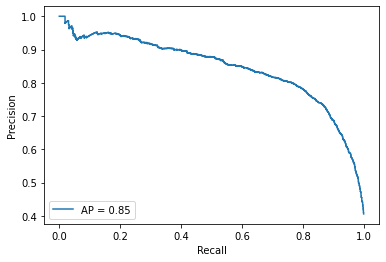

In [286]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob_class_1)
prd = PrecisionRecallDisplay(precision, recall, average_precision=ap)
prd.plot()

In [288]:
threshold.mean()

0.4005691020526133

In [290]:
#Calculating the predicted probability value that maximizes the F1 score, which is the harmonic mean of precision and recall
optimal_proba_cutoff = sorted(list(zip(np.abs(precision - recall), y_pred_prob_class_1)), key=lambda i: i[0], reverse=False)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_prob_class_1]

In [293]:
optimal_proba_cutoff

0.7879737213633002

In [295]:
print("Precision Score Before and After Changing Thresholding: {}, {}".format(precision_score(y_test, y_pred), precision_score(y_test, roc_predictions)))

Precision Score Before and After Thresholding: 0.7844863731656184, 0.872651356993737


In [296]:
print(classification_report(y_test,roc_predictions))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      3567
           1       0.87      0.51      0.65      2438

    accuracy                           0.77      6005
   macro avg       0.81      0.73      0.74      6005
weighted avg       0.79      0.77      0.76      6005



In [248]:
cv_results = cross_val_score(logreg,X_train,y_train, cv = 10)

In [249]:
print('Cross-Validation Accuracy Scores', cv_results) # Results are consistent - Average 0.82
cv_results.mean()

Cross-Validation Accuracy Scores [0.83388843 0.81973356 0.82764363 0.81890092 0.82348043 0.82306411
 0.82632237 0.8300708  0.82757185 0.81091212]


0.8241588208632195

In [250]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [251]:
#GridSearchCV
logreg_param = {'regressor__max_iter':np.arange(100,400,50)} 

grid_search_base = GridSearchCV(logreg_base,logreg_param,scoring='precision', cv =5) ### TODO: Instead of scoring based on Accuracy, Precision is used. 
grid_search_base.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_logistic',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['usName']),
                                                                        ('text',
                                                                         Pipeline(steps=[('vectorizer',
                                                                                          CountVectorizer())]),
                                                                         'text')])),
                                       ('regressor',
                                        LogisticRegression(max_iter=200))]),
             param_grid={'regressor__max_iter': array([100, 150, 200, 250, 300, 350])},
             scoring='precision')

In [252]:
print(grid_search_base.best_estimator_)

Pipeline(steps=[('preprocessor_logistic',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['usName']),
                                                 ('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'text')])),
                ('regressor', LogisticRegression(max_iter=250))])


In [ ]:
#>>>>Decision Tree Classifier<<<<<

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df_model.info()

In [ ]:
#Create Pipelines for Categorical and Text Features

steps_cat_decision = [('imputer', SimpleImputer(strategy ='most_frequent')),
                      ('onehot',OneHotEncoder(handle_unknown = 'ignore'))]

steps_text_decision = [('vector', CountVectorizer())]


categorical_transformer = Pipeline(steps = steps_cat_decision)
text_transformer = Pipeline(steps = steps_text_decision)

cat_features = ['usName']
text_features_baseline = 'tokens'
text_features_final = 'tokens_lemmatize'


#ColumnTransformer
preprocessor_decision_baseline = ColumnTransformer(transformers = [('cat',categorical_transformer,cat_features),
                                                                   ('text', text_transformer,text_features_baseline)])

preprocessor_decision_final = ColumnTransformer(transformers = [('cat',categorical_transformer,cat_features),
                                                                ('text',text_transformer,text_features_final)])

#Pipeline
decision_tree_base = Pipeline(steps = [('preprocessor_decision_baseline', preprocessor_decision_baseline),
                                       ('decision_tree', DecisionTreeClassifier(max_depth = 9, random_state =42))])

decision_tree = Pipeline(steps = [('preprocessor_decision-final',preprocessor_decision_final),
                                  ('decision_tree', DecisionTreeClassifier(max_depth = 9, random_state =42))])


#Define X and y
y = df_model.edInput 
X = df_model.drop('edInput',axis =1).astype(str)


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

#Fit
decision_tree_model_base = decision_tree_base.fit(X_train,y_train)

decision_tree_model = decision_tree.fit(X_train,y_train)

#Predict
t0 = time.time()
y_pred_tree_baseline = decision_tree_model_base.predict(X_test)
print("Training time Baseline:", time.time()-t0)

t1 = time.time()
y_pred_tree_final = decision_tree_model.predict(X_test)
print("Training time Final:", time.time()-t1)

#Accuracy
acc_baseline = accuracy_score(y_test,y_pred_tree_baseline)
print('Accuracy Score - Baseline: '+ str(acc_baseline))

acc_final = accuracy_score(y_test,y_pred_tree_final)
print('Accuracy Score - Final: '+ str(acc_final))

#Cross Validation
cv_results_base = cross_val_score(decision_tree_base,X_train,y_train, cv=10)
print('CV Results - Baseline: ' + str(cv_results_base.mean()))

cv_results_final = cross_val_score(decision_tree, X_train,y_train, cv=10)
print('CV Results - Final: ' + str(cv_results_final.mean()))

In [ ]:
###TODO: RandomForest ile denilecek.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
#GridSearchCV
tree_param = {'decision_tree__max_depth':np.arange(1,10,2)}
#'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]

grid_search_base = GridSearchCV(decision_tree_base,tree_param,scoring='accuracy', cv =5)
grid_search_base.fit(X_train,y_train)

In [ ]:
print(grid_search_base.best_estimator_)

In [ ]:
#GridSearchCV
tree_param = {'decision_tree__max_depth':np.arange(1,10,2)}
#'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]

grid_search_final = GridSearchCV(decision_tree,tree_param,scoring='accuracy', cv =5)
grid_search_final.fit(X_train,y_train)

In [ ]:
print(grid_search_final.best_estimator_)

In [ ]:
df_section.info()

In [ ]:
#use this part to split the text column
#X = df_section.iloc[4:5,5].to_string().split(",")

In [ ]:
#Notes:
#    1. Check urllinks - related to business websites
#    2. Agirlik ortalamasi belirlemek 
#    3. drop duplicates